In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:

def cal_cdf(s):
    s.sort()
    cdf = []
    key = []
    sample_size = len(s)
    #print(s)
    s.append(-1)
    #print(s)
    
    i = 0
    while(i < sample_size):
        
        while(s[i] == s[i+1]):
            i = i+1 
                        

        key.append(s[i]) 
        cdf.append(float((i+1)/sample_size) )
        i = i+1


    #print(key,cdf)
    return key,cdf
    


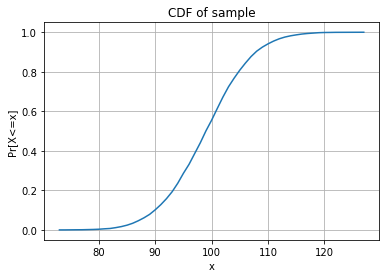

In [4]:
s = np.random.binomial(199,0.5,10000)
#print(len(s)
#s = [3,1,7]
key, cdf = cal_cdf(s.tolist())

plt.figure('Cumulative Distribution')
plt.plot(key,cdf)
plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('CDF of sample')
plt.grid()
plt.show()

In [5]:
#m=10000
import collections

def cal_avg_cdf(m):
    keys = []
    cdfs = []
    for i in range(m):
        s = np.random.binomial(199,0.5,10)
        key, cdf = cal_cdf(s.tolist())  
        keys += key
        cdfs += cdf

    #print(keys)

    #print(cdfs)
    #print("######")
    final_keys = []
    final_cdfs = []
    for item in keys:
        #print(item)
        if (item not in final_keys):
            indices = [i for i, x in enumerate(keys) if x == item]
            val = 0
            for index in indices:
                val = val+ cdfs[index]

            final_keys.append(item)
            final_cdfs.append(float(val/len(indices)))

    #print(final_keys)
    #print(final_cdfs)
    final = {}
    for i in range(len(final_keys)):
        #print(final_keys[i],final_cdfs[i])
        final[final_keys[i]] = final_cdfs[i]

    #print(final)
    
    sorted_final = collections.OrderedDict(sorted(final.items()))
    #print(sorted_final)
    return sorted_final

    

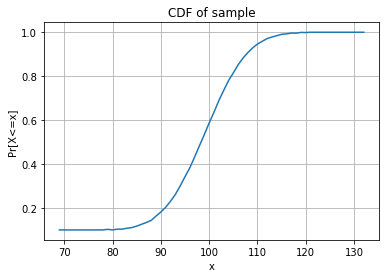

In [8]:
sorted_final = cal_avg_cdf(10000)
plt.figure('Cumulative Distribution')
plt.plot(list(sorted_final.keys()),list(sorted_final.values()))
plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('CDF of sample')
plt.grid()
plt.show()

In [32]:
import math 
def cal_normal_CI(cdf):
    Z_val = 1.96 # for alpha=0.05
    U= []
    L= []
    n = len(cdf)
    for item in cdf:
        se = math.sqrt((item*(1-item))/n)
        L.append(item - Z_val*se)
        U.append(item + Z_val*se)
    
    #print(U,L)
    return U,L
    

In [34]:
def cal_DKW_CI(cdf):
    alpha = 0.05
    U= []
    L= []
    n = len(cdf)
    epsilon = math.sqrt((math.log(2/alpha))/(2*n))
    for item in cdf:
        L.append(item - epsilon)
        U.append(item + epsilon)
    
    #print(U,L)
    return U,L

In [35]:
import pandas as pd
data = pd.read_csv('q8.csv')
data.describe()

,x
count,799.000000
mean,1.016984
std,0.583943
min,0.004343
25%,0.513077
50%,1.007278
75%,1.558829
max,1.999127


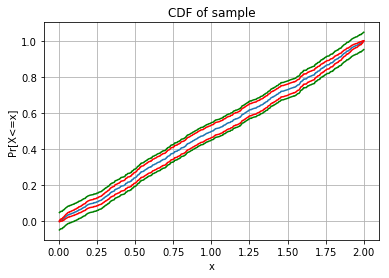

In [40]:
s = [3,1,7]
key, cdf = cal_cdf(data['x'].tolist())
upper_norm_CI, lower_norm_CI = cal_normal_CI(cdf)
upper_DKW_CI, lower_DKW_CI = cal_DKW_CI(cdf)

#plt.figure(figsize=(20,20))
plt.figure('Cumulative Distribution')
plt.plot(key,cdf)

plt.plot(key,upper_norm_CI,color='red')
plt.plot(key,lower_norm_CI,color='red')

plt.plot(key,upper_DKW_CI,color='green')
plt.plot(key,lower_DKW_CI,color='green')

plt.xlabel('x')
plt.ylabel('Pr[X<=x]')
plt.title('CDF of sample')
plt.grid()
plt.show()